Лабораторна робота №4. Структури для роботи з великими обсягами даних в Python


Виконала студентка групи ФБ-35 Дедяєва Софія

In [26]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import OneHotEncoder
print("Setup complete")

Setup complete


Перший рівень (спрощені завдання)

In [27]:
def load_energy_data(filepath):
    columns = ["Date", "Time", "Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity",
               "Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]
    data = pd.read_csv(filepath, header=1, sep=";", names=columns, low_memory=False, na_values="?")
    data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], dayfirst=True)
    data = data.dropna()
    data = data.drop(['Date', 'Time'], axis=1)
    return data

energy_df = load_energy_data("C:/Users/didya/PycharmProjects/JupyterProject/lab4/household_power_consumption.txt")
energy_df


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
1,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
2,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
3,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
4,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00
...,...,...,...,...,...,...,...,...
2075253,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075254,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075255,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075256,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [28]:
def load_power_data_np(filepath):
    dtype_def = [
        ('Date', 'U10'), ('Time', 'U8'),
        ('Global_active_power', 'f8'), ('Global_reactive_power', 'f8'),
        ('Voltage', 'f8'), ('Global_intensity', 'f8'),
        ('Sub_metering_1', 'f8'), ('Sub_metering_2', 'f8'), ('Sub_metering_3', 'f8')
    ]
    dataset = np.genfromtxt(filepath, delimiter=';', names=True, dtype=dtype_def, encoding=None)
    dataset = dataset.transpose()
    missing_values_mask = (
        np.isnan(dataset['Sub_metering_1']) |
        np.isnan(dataset['Sub_metering_2']) |
        np.isnan(dataset['Sub_metering_3'])
    )
    cleaned_dataset = dataset[~missing_values_mask]
    return cleaned_dataset

np_data = load_power_data_np("C:/Users/didya/PycharmProjects/JupyterProject/lab4/household_power_consumption.txt")
np_data

array([('16/12/2006', '17:24:00', 4.216, 0.418, 234.84, 18.4, 0., 1., 17.),
       ('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0., 1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0., 2., 17.),
       ...,
       ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)],
      shape=(2049280,), dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

Перший рівень: 1. Обрати всі записи, у яких загальна активна споживана потужність
перевищує 5 кВт.

In [29]:
def filter_active_power(energy_df):
    active = energy_df[energy_df["Global_active_power"] > 5]
    return active

start_time = time.time()
active = filter_active_power(energy_df)
end_time = time.time() - start_time

print(f"Час: {end_time}")
active.head(5)

Час: 0.007474660873413086


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
1,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
2,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
10,5.412,0.470,232.78,23.2,0.0,1.0,17.0,2006-12-16 17:35:00
11,5.224,0.478,232.99,22.4,0.0,1.0,16.0,2006-12-16 17:36:00


In [30]:
def select_records_with_high_power(np_data):
    mask = np_data['Global_active_power'] > 5
    selected = np_data[mask]
    return selected

start_time = time.time()
selected_np = select_records_with_high_power(np_data)
end_time = time.time() - start_time

print(f"ЧАС: {end_time}")
selected_np

ЧАС: 0.015904903411865234


array([('16/12/2006', '17:25:00', 5.36 , 0.436, 233.63, 23. , 0.,  1., 16.),
       ('16/12/2006', '17:26:00', 5.374, 0.498, 233.29, 23. , 0.,  2., 17.),
       ('16/12/2006', '17:27:00', 5.388, 0.502, 233.74, 23. , 0.,  1., 17.),
       ...,
       ('24/11/2010', '07:50:00', 5.172, 0.05 , 235.18, 22. , 0., 38., 17.),
       ('24/11/2010', '07:51:00', 5.75 , 0.   , 234.4 , 24.6, 0., 39., 17.),
       ('25/11/2010', '07:21:00', 5.074, 0.24 , 238.55, 21.4, 1.,  2., 18.)],
      shape=(17547,), dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

2. Обрати всі записи, у яких вольтаж перевищую 235 В.

In [31]:
def filter_voltage(energy_df):
    volt = energy_df[energy_df["Voltage"] > 235]
    return volt

start_time = time.time()
volt = filter_voltage(energy_df)
end_time = time.time() - start_time

print(f"Час: {end_time}")
volt.head(5)

Час: 0.052095890045166016


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
3,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
4,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2006-12-16 17:29:00
5,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2006-12-16 17:30:00
6,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2006-12-16 17:31:00
13,4.054,0.422,235.24,17.6,0.0,1.0,17.0,2006-12-16 17:38:00


In [32]:
def filter_voltage_np(np_data):
    mask = np_data['Voltage'] > 235
    volt_np = np_data[mask]
    return volt_np

start_time = time.time()
volt_np = filter_voltage_np(np_data)
end_time = time.time() - start_time

print(f"Час: {end_time}")
volt_np

Час: 0.0953211784362793


array([('16/12/2006', '17:28:00', 3.666, 0.528, 235.68, 15.8, 0., 1., 17.),
       ('16/12/2006', '17:29:00', 3.52 , 0.522, 235.02, 15. , 0., 2., 17.),
       ('16/12/2006', '17:30:00', 3.702, 0.52 , 235.09, 15.8, 0., 1., 17.),
       ...,
       ('26/11/2010', '21:00:00', 0.938, 0.   , 239.82,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:01:00', 0.934, 0.   , 239.7 ,  3.8, 0., 0.,  0.),
       ('26/11/2010', '21:02:00', 0.932, 0.   , 239.55,  3.8, 0., 0.,  0.)],
      shape=(1952491,), dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

3. Обрати всі записи, у яких сила струму лежить в межах 19-20 А,
для них виявити ті, у яких пральна машина та холодильних
споживають більше, ніж бойлер та кондиціонер.

In [33]:
def filter_current_and_submeter(energy_df):
    condition = energy_df["Global_intensity"].between(19, 20) & (energy_df["Sub_metering_2"] > energy_df["Sub_metering_3"])
    filtered = energy_df[condition]
    return filtered

start_time = time.time()
filtered_energy = filter_current_and_submeter(energy_df)
end_time = time.time() - start_time

print(f"Час: {end_time}")
filtered_energy.head(5)

Час: 0.011732101440429688


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
44,4.464,0.136,234.66,19.0,0.0,37.0,16.0,2006-12-16 18:09:00
459,4.582,0.258,238.08,19.6,0.0,13.0,0.0,2006-12-17 01:04:00
463,4.618,0.104,239.61,19.6,0.0,27.0,0.0,2006-12-17 01:08:00
474,4.636,0.140,237.37,19.4,0.0,36.0,0.0,2006-12-17 01:19:00
475,4.634,0.152,237.17,19.4,0.0,35.0,0.0,2006-12-17 01:20:00


In [34]:
def select_current_and_power_usage(np_data):
    cond1 = np.logical_and(np_data['Global_intensity'] >= 19, np_data['Global_intensity'] <= 20)
    cond2 = np_data['Sub_metering_2'] > np_data['Sub_metering_3']
    filtered_data = np_data[np.logical_and(cond1, cond2)]
    return filtered_data

start_time = time.time()
filtered_np = select_current_and_power_usage(np_data)
end_time = time.time() - start_time

print(f"Час: {end_time}")
filtered_np

Час: 0.049855709075927734


array([('16/12/2006', '18:09:00', 4.464, 0.136, 234.66, 19. , 0., 37., 16.),
       ('17/12/2006', '01:04:00', 4.582, 0.258, 238.08, 19.6, 0., 13.,  0.),
       ('17/12/2006', '01:08:00', 4.618, 0.104, 239.61, 19.6, 0., 27.,  0.),
       ...,
       ('24/11/2010', '07:55:00', 4.602, 0.   , 237.08, 19.4, 0., 40., 17.),
       ('24/11/2010', '07:56:00', 4.536, 0.   , 237.03, 19. , 0., 39., 17.),
       ('24/11/2010', '07:57:00', 4.626, 0.   , 236.78, 19.4, 0., 39., 17.)],
      shape=(2509,), dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

4. Обрати випадковим чином 500000 записів (без повторів елементів
вибірки), для них обчислити середні величини усіх 3-х груп
споживання електричної енергії

In [35]:
def sample_and_calc_means(energy_df):
    random_sample = energy_df.sample(n=500000, replace=False)
    mean_1 = random_sample['Sub_metering_1'].mean()
    mean_2 = random_sample['Sub_metering_2'].mean()
    mean_3 = random_sample['Sub_metering_3'].mean()
    print("Середнє значення Sub_metering_1:", mean_1)
    print("Середнє значення Sub_metering_2:", mean_2)
    print("Середнє значення Sub_metering_3:", mean_3)
    return random_sample

start_time = time.time()
sampled_data = sample_and_calc_means(energy_df)
end_time = time.time() - start_time

print(f"Час: {end_time}")
sampled_data.head(5)

Середнє значення Sub_metering_1: 1.139766
Середнє значення Sub_metering_2: 1.291096
Середнє значення Sub_metering_3: 6.465302
Час: 0.1544184684753418


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
127423,0.298,0.090,240.58,1.2,0.0,2.0,0.0,2007-03-15 05:08:00
1661050,0.360,0.094,245.49,1.4,0.0,0.0,1.0,2010-02-12 05:35:00
1614689,0.360,0.154,250.21,1.6,0.0,0.0,0.0,2010-01-11 00:54:00
1609653,1.458,0.112,244.32,5.8,0.0,0.0,19.0,2010-01-07 12:58:00
14153,2.752,0.272,239.78,11.4,0.0,0.0,18.0,2006-12-26 13:18:00


In [36]:
def sample_random_records(np_data):
    sampled_indices = np.random.choice(len(np_data), 500000, replace=False)
    sampled_np = np_data[sampled_indices]
    mean_sub_metering_1 = sampled_np['Sub_metering_1'].mean()
    mean_sub_metering_2 = sampled_np['Sub_metering_2'].mean()
    mean_sub_metering_3 = sampled_np['Sub_metering_3'].mean()
    print("Середнє значення Sub_metering_1:", mean_sub_metering_1)
    print("Середнє значення Sub_metering_2:", mean_sub_metering_2)
    print("Середнє значення Sub_metering_3:", mean_sub_metering_3)
    return sampled_np

start_time = time.time()
samples = sample_random_records(np_data)
end_time = time.time() - start_time

print(f"Час: {end_time}")
samples

Середнє значення Sub_metering_1: 1.111876
Середнє значення Sub_metering_2: 1.295162
Середнє значення Sub_metering_3: 6.46856
Час: 0.1352541446685791


array([('21/1/2008', '06:40:00', 2.74 , 0.262, 237.59, 11.8, 0., 1., 17.),
       ('30/3/2010', '13:02:00', 1.482, 0.22 , 240.07,  6.2, 0., 0., 18.),
       ('29/7/2010', '20:13:00', 0.162, 0.   , 243.19,  0.6, 0., 0.,  0.),
       ...,
       ('3/11/2009', '09:59:00', 1.784, 0.774, 239.56,  8.4, 1., 0.,  0.),
       ('6/8/2010', '18:30:00', 0.258, 0.124, 242.05,  1.2, 0., 0.,  1.),
       ('22/6/2009', '18:02:00', 0.354, 0.108, 242.37,  1.4, 0., 0.,  0.)],
      shape=(500000,), dtype=[('Date', '<U10'), ('Time', '<U8'), ('Global_active_power', '<f8'), ('Global_reactive_power', '<f8'), ('Voltage', '<f8'), ('Global_intensity', '<f8'), ('Sub_metering_1', '<f8'), ('Sub_metering_2', '<f8'), ('Sub_metering_3', '<f8')])

5. Обрати ті записи, які після 18-00 споживають понад 6 кВт за
хвилину в середньому, серед відібраних визначити ті, у яких
основне споживання електроенергії у вказаний проміжок часу
припадає на пральну машину, сушарку, холодильник та освітлення
(група 2 є найбільшою), а потім обрати кожен третій результат із
першої половини та кожен четвертий результат із другої половини.

In [37]:
def select_evening_high_power_records(energy_df):
    selected = energy_df[(energy_df['Datetime'].dt.hour >= 18) & (energy_df['Global_active_power'] > 6)]
    group2_dominant = selected[(selected["Sub_metering_2"] > selected["Sub_metering_1"]) &
                              (selected["Sub_metering_2"] > selected["Sub_metering_3"])]
    half_len = len(group2_dominant) // 2
    first_half_sample = group2_dominant.iloc[:half_len].iloc[::3, :]
    second_half_sample = group2_dominant.iloc[half_len:].iloc[::4, :]
    final_selection = pd.concat([first_half_sample, second_half_sample])
    return final_selection

start_time = time.time()
evening_sample = select_evening_high_power_records(energy_df)
end_time = time.time() - start_time

print(f"Час: {end_time}")
evening_sample.head(5)

Час: 0.04710793495178223


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
40,6.052,0.192,232.93,26.2,0.0,37.0,17.0,2006-12-16 18:05:00
43,6.308,0.116,232.25,27.0,0.0,36.0,17.0,2006-12-16 18:08:00
17493,6.386,0.374,236.63,27.0,1.0,36.0,17.0,2006-12-28 20:58:00
17497,8.088,0.262,235.50,34.4,1.0,72.0,17.0,2006-12-28 21:02:00
17500,7.230,0.152,235.22,30.6,1.0,73.0,17.0,2006-12-28 21:05:00


In [38]:
def evening_power_np(np_data):
    hours = np.array([int(t.split(':')[0]) for t in np_data["Time"]])
    filtered_data = np_data[(hours > 18) & (np_data['Global_active_power'] > 6)]
    filtered_data2 = filtered_data[
        (filtered_data["Sub_metering_1"] < filtered_data["Sub_metering_2"]) &
        (filtered_data["Sub_metering_3"] < filtered_data["Sub_metering_2"])]
    first_half = filtered_data2[:len(filtered_data2) // 2]
    second_half = filtered_data2[len(filtered_data2) // 2:]
    final_result = np.concatenate([first_half[::3], second_half[::4]])
    return final_result

start_time = time.time()
evening_filtered_np = evening_power_np(np_data)
end_time = time.time() - start_time

print(f"Час: {end_time}")
evening_filtered_np

Час: 0.901909589767456


array([('18/12/2006', '19:31:00',  6.158, 0.442, 229.08, 27. ,  0., 36.,  0.),
       ('28/12/2006', '21:01:00',  7.062, 0.27 , 235.76, 30.2,  2., 65., 17.),
       ('28/12/2006', '21:04:00',  7.376, 0.238, 234.67, 31.4,  1., 72., 17.),
       ('28/12/2006', '21:07:00',  7.248, 0.   , 235.34, 30.8,  1., 72., 17.),
       ('28/12/2006', '21:10:00',  7.16 , 0.   , 235.49, 30.4,  1., 73., 18.),
       ('28/12/2006', '21:13:00',  9.132, 0.084, 231.27, 39.4, 36., 71., 16.),
       ('28/12/2006', '21:16:00',  8.046, 0.114, 231.77, 35. , 36., 52., 16.),
       ('28/12/2006', '21:21:00',  7.124, 0.148, 234.33, 30.4, 37., 38., 17.),
       ('29/12/2006', '21:18:00',  6.15 , 0.118, 230.77, 26.6,  0., 70.,  0.),
       ('29/12/2006', '21:21:00',  6.412, 0.136, 230.49, 27.8,  0., 70.,  0.),
       ('29/12/2006', '21:24:00',  6.15 , 0.   , 230.71, 26.6,  0., 70.,  0.),
       ('29/12/2006', '21:28:00',  6.692, 0.   , 228.77, 29.2,  0., 69., 17.),
       ('29/12/2006', '22:27:00',  6.976, 0.376, 235

# Другий рівень (ускладнений)
# https://archive.ics.uci.edu/dataset/38/echocardiogram

## Завдання другого рівня

1. Поборотися із зниклими даними. Для цього подивитись https://archive.ics.uci.edu/dataset/56/labor+relations

In [39]:
def create_energy_df(filepath):
    headers = ["dur", "wage1.wage", "wage2.wage", "wage3.wage",
               "cola", "hours.hrs", "pension", "stby_pay", "shift_diff",
               "educ_allw", "holidays", "vacation", "lngtrm_disabil",
               "dntl_ins", "bereavement.boolean", "empl_hplan", "label"]

    energy_df = pd.read_csv(filepath, header=None, sep=",", names=headers, on_bad_lines='skip', na_values="?")
    energy_df.drop(columns=['wage2.wage', 'pension', 'hours.hrs', 'shift_diff', 'vacation'], inplace=True)
    energy_df = energy_df[energy_df['dur'].notna()]

    for col in ['wage1.wage', 'stby_pay', 'educ_allw']:
        energy_df[col] = pd.to_numeric(energy_df[col], errors='coerce')
        energy_df[col] = energy_df[col].fillna(energy_df[col].mean())

    if energy_df['cola'].dtype in ['float64', 'int64']:
        energy_df['cola'] = energy_df['cola'].fillna(energy_df['cola'].mean())

    cat_columns = ['holidays', 'lngtrm_disabil', 'dntl_ins', 'bereavement.boolean',
                   'wage3.wage', 'cola', 'educ_allw', 'empl_hplan']

    for col in cat_columns:
        if energy_df[col].isna().sum() > 0:
            freqs = energy_df[col].value_counts(normalize=True, dropna=True)
            if freqs.empty:
                energy_df.drop(columns=[col], inplace=True)
            else:
                energy_df[col] = energy_df[col].apply(
                    lambda x: np.random.choice(freqs.index, p=freqs.values) if pd.isna(x) else x
                )
    return energy_df

start_time = time.time()
energy_df = create_energy_df("C:/Users/didya/PycharmProjects/JupyterProject/lab4/C4.5/labor-neg.data")
print(f"Час: {time.time() - start_time} сек")
energy_df

Час: 0.010409832000732422 сек


,dur,wage1.wage,wage3.wage,cola,stby_pay,holidays,lngtrm_disabil,dntl_ins,bereavement.boolean,empl_hplan,label
0,1.0,5.0,4.6,none,6.142857,11.0,yes,half,yes,full,good
1,2.0,4.5,5.0,tcf,6.142857,11.0,yes,full,yes,full,good
3,3.0,3.7,5.0,tc,6.142857,12.0,no,half,yes,full,good
4,3.0,4.5,5.0,none,6.142857,12.0,yes,half,yes,half,good
5,2.0,2.0,5.0,none,6.142857,12.0,yes,full,yes,half,good
6,3.0,4.0,5.0,tc,6.142857,12.0,yes,none,yes,half,good
7,3.0,6.9,2.3,none,6.142857,12.0,yes,half,yes,full,good
8,2.0,3.0,2.0,none,12.000000,11.0,yes,half,yes,full,good
9,1.0,5.7,2.1,none,6.142857,11.0,yes,full,no,full,good
10,3.0,3.5,4.6,none,6.142857,13.0,no,full,yes,full,good


In [51]:
def load_and_clean_np_data(filepath):
    num_columns = 17
    with open(filepath, "r", encoding="utf-8") as f:
        rows = [line.strip().split(",") for line in f]
    clean_rows = [r[:num_columns] for r in rows if len(r) >= num_columns]
    np_data = np.array(clean_rows, dtype=object)

    headers = ["dur", "wage1.wage", "wage2.wage", "wage3.wage",
               "cola", "hours.hrs", "pension", "stby_pay", "shift_diff",
               "educ_allw", "holidays", "vacation", "lngtrm_disabil",
               "dntl_ins", "bereavement.boolean", "empl_hplan", "label"]

    cols_to_remove = ["wage2.wage", "pension", "educ_allw", "hours.hrs", "shift_diff", "vacation"]
    indices_to_remove = [headers.index(col) for col in cols_to_remove]
    np_data = np.delete(np_data, indices_to_remove, axis=1)
    headers = [h for i, h in enumerate(headers) if i not in indices_to_remove]

    numeric_names = ["dur", "wage1.wage", "wage3.wage", "cola", "stby_pay"]
    numeric_indices = [headers.index(name) for name in numeric_names]

    for i in numeric_indices:
        col = np_data[:, i]
        numeric_col = []
        for val in col:
            try:
                numeric_col.append(float(val))
            except:
                numeric_col.append(np.nan)
        numeric_col = np.array(numeric_col)
        if np.all(np.isnan(numeric_col)):
            mean_val = 0.0
        else:
            mean_val = np.nanmean(numeric_col)
        numeric_col = np.where(np.isnan(numeric_col), mean_val, numeric_col)
        np_data[:, i] = numeric_col

    cat_names = [h for h in headers if h not in numeric_names]
    cat_indices = [headers.index(name) for name in cat_names]

    for i in cat_indices:
        col = np_data[:, i]
        known = col[col != "?"]
        if len(known) == 0:
            continue
        values, counts = np.unique(known, return_counts=True)
        probs = counts / counts.sum()
        fill_count = np.sum(col == "?")
        col[col == "?"] = np.random.choice(values, size=fill_count, p=probs)
        np_data[:, i] = col

    return np_data, headers

start_time = time.time()
np_data, np_headers = load_and_clean_np_data("C:/Users/didya/PycharmProjects/JupyterProject/lab4/C4.5/labor-neg.data")
print(f"Час: {time.time() - start_time} сек")
print(np_data)

Час: 0.0011930465698242188 сек
[[1.0 5.0 3.766666666666667 0.0 6.142857142857143 '11' 'yes' 'full' 'yes'
  'full' 'good']
 [2.0 4.5 3.766666666666667 0.0 6.142857142857143 '11' 'yes' 'full' 'yes'
  'full' 'good']
 [2.1025641025641026 3.62051282051282 3.766666666666667 0.0
  6.142857142857143 '11' 'yes' 'half' 'yes' 'half' 'good']
 [3.0 3.7 5.0 0.0 6.142857142857143 '13' 'no' 'none' 'yes' 'half' 'good']
 [3.0 4.5 5.0 0.0 6.142857142857143 '12' 'yes' 'half' 'yes' 'half' 'good']
 [2.0 2.0 3.766666666666667 0.0 6.142857142857143 '12' 'yes' 'none' 'yes'
  'full' 'good']
 [3.0 4.0 5.0 0.0 6.142857142857143 '12' 'yes' 'none' 'yes' 'half' 'good']
 [3.0 6.9 2.3 0.0 6.142857142857143 '12' 'no' 'full' 'yes' 'half' 'good']
 [2.0 3.0 3.766666666666667 0.0 12.0 '11' 'yes' 'half' 'yes' 'none'
  'good']
 [1.0 5.7 3.766666666666667 0.0 6.142857142857143 '11' 'yes' 'full' 'yes'
  'full' 'good']
 [3.0 3.5 4.6 0.0 6.142857142857143 '13' 'yes' 'full' 'yes' 'full' 'good']
 [2.0 6.4 3.766666666666667 0.0 6.1

2. Пронормувати вибраний датасет або стандартизувати його
(нормування і стандартизація мають бути реалізовані як окремі функції без застосування додаткових бібліотек, як наприклад
sklearn.preprocessing).

In [41]:
def normalize_energy_df(energy_df):
    energy_df_norm = energy_df.copy()
    for col in energy_df_norm.select_dtypes(include=['float64', 'int64']):
        min_val = energy_df_norm[col].min()
        max_val = energy_df_norm[col].max()
        if min_val != max_val:
            energy_df_norm[col] = (energy_df_norm[col] - min_val) / (max_val - min_val)
    return energy_df_norm

start_time = time.time()
energy_df = normalize_energy_df(energy_df)
end_time = time.time() - start_time

print(f"Час: {end_time}")
energy_df

Час: 0.001998424530029297


,dur,wage1.wage,wage3.wage,cola,stby_pay,holidays,lngtrm_disabil,dntl_ins,bereavement.boolean,empl_hplan,label
0,0.0,0.612245,0.838710,none,0.376623,0.333333,yes,half,yes,full,good
1,0.5,0.510204,0.967742,tcf,0.376623,0.333333,yes,full,yes,full,good
3,1.0,0.346939,0.967742,tc,0.376623,0.500000,no,half,yes,full,good
4,1.0,0.510204,0.967742,none,0.376623,0.500000,yes,half,yes,half,good
5,0.5,0.000000,0.967742,none,0.376623,0.500000,yes,full,yes,half,good
6,1.0,0.408163,0.967742,tc,0.376623,0.500000,yes,none,yes,half,good
7,1.0,1.000000,0.096774,none,0.376623,0.500000,yes,half,yes,full,good
8,0.5,0.204082,0.000000,none,0.909091,0.333333,yes,half,yes,full,good
9,0.0,0.755102,0.032258,none,0.376623,0.333333,yes,full,no,full,good
10,1.0,0.306122,0.838710,none,0.376623,0.666667,no,full,yes,full,good


In [57]:
def normalize_numpy(np_data):
    np_data_norm = np_data.copy()
    num_cols = np_data.shape[1]
    for i in range(num_cols):
        try:
            col = np_data_norm[:, i].astype(float)
            min_val = np.min(col)
            max_val = np.max(col)
            if min_val != max_val:
                col_norm = (col - min_val) / (max_val - min_val)
                np_data_norm[:, i] = col_norm
        except:
            continue
    return np_data_norm

start_time = time.time()
np_data = normalize_numpy(np_data)
print(f"Час: {time.time() - start_time:} сек")
print(np_data)


Час: 0.0 сек
[[0.0 0.6122448979591836 0.5698924731182797 0.0 0.37662337662337664
  0.3333333333333333 'yes' 'full' 'yes' 'full' 'good']
 [0.5 0.5102040816326531 0.5698924731182797 0.0 0.37662337662337664
  0.3333333333333333 'yes' 'full' 'yes' 'full' 'good']
 [0.5512820512820513 0.33071690214547345 0.5698924731182797 0.0
  0.37662337662337664 0.3333333333333333 'yes' 'half' 'yes' 'half' 'good']
 [1.0 0.3469387755102041 0.9677419354838711 0.0 0.37662337662337664
  0.6666666666666666 'no' 'none' 'yes' 'half' 'good']
 [1.0 0.5102040816326531 0.9677419354838711 0.0 0.37662337662337664 0.5
  'yes' 'half' 'yes' 'half' 'good']
 [0.5 0.0 0.5698924731182797 0.0 0.37662337662337664 0.5 'yes' 'none'
  'yes' 'full' 'good']
 [1.0 0.4081632653061224 0.9677419354838711 0.0 0.37662337662337664 0.5
  'yes' 'none' 'yes' 'half' 'good']
 [1.0 1.0 0.09677419354838705 0.0 0.37662337662337664 0.5 'no' 'full'
  'yes' 'half' 'good']
 [0.5 0.2040816326530612 0.5698924731182797 0.0 0.9090909090909091
  0.3333333

3. Збудувати гістограму по одному із атрибутів, що буде показувати на
кількість елементів, що знаходяться у 10 діапазонах, які ви задасте.

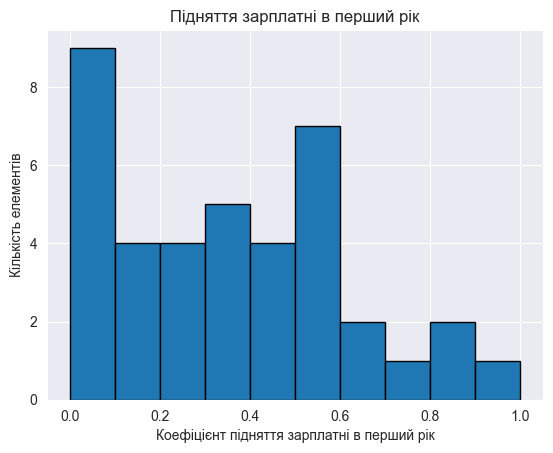

In [47]:
bins = np.linspace(energy_df['wage1.wage'].min(), energy_df['wage1.wage'].max(), 11)
plt.hist(energy_df['wage1.wage'], bins=bins, edgecolor='black')
plt.title('Підняття зарплатні в перший рік')
plt.xlabel('Коефіцієнт підняття зарплатні в перший рік')
plt.ylabel('Кількість елементів')
plt.show()

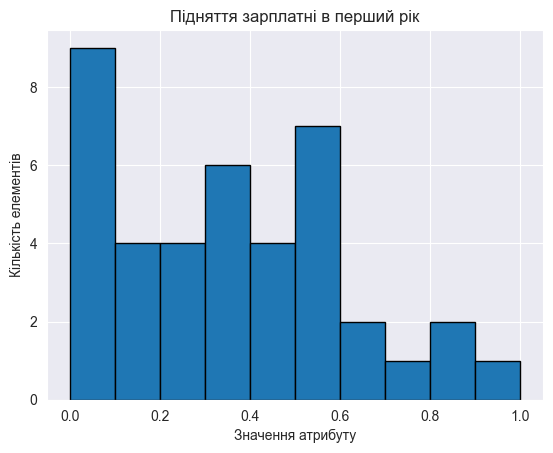

In [59]:
col_index = np_headers.index("wage1.wage")
values = np_data[:, col_index].astype(float)
bins = np.linspace(np.min(values), np.max(values), 11)
plt.hist(values, bins=bins, edgecolor="black")
plt.title("Підняття зарплатні в перший рік")
plt.xlabel("Значення атрибуту")
plt.ylabel("Кількість елементів")
plt.show()

4. Збудувати графік залежності одного integer/real атрибута від іншого.

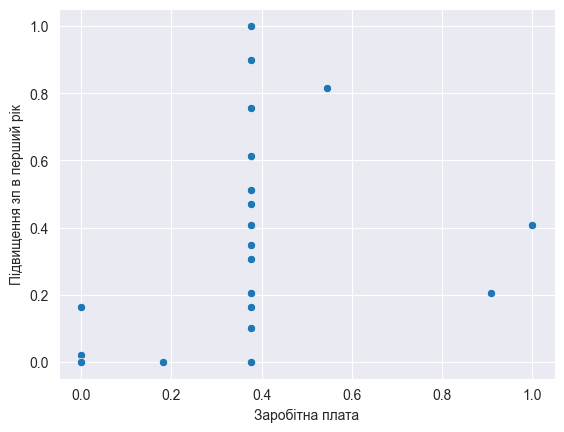

In [60]:
sns.scatterplot(x=energy_df['stby_pay'], y=energy_df["wage1.wage"])
plt.xlabel('Заробітна плата')
plt.ylabel('Підвищення зп в перший рік')
plt.show()

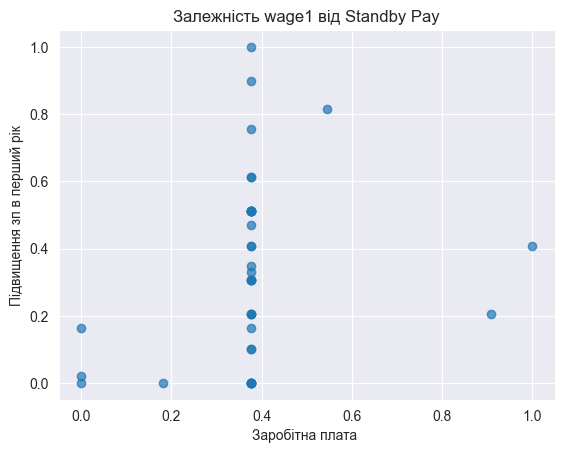

In [62]:
x_index = np_headers.index("stby_pay")
y_index = np_headers.index("wage1.wage")

x = np_data[:, x_index].astype(float)
y = np_data[:, y_index].astype(float)
plt.scatter(x, y, alpha=0.7)
plt.xlabel('Заробітна плата ')
plt.ylabel('Підвищення зп в перший рік')
plt.title('Залежність wage1 від Standby Pay')
plt.show()

5. Підрахувати коефіцієнт Пірсона та Спірмена для двох integer/real
атрибутів.

In [64]:
# Pandas
pearson_corr_pandas, _ = pearsonr(energy_df['wage1.wage'], energy_df['stby_pay'])
spearman_corr_pandas, _ = spearmanr(energy_df['wage1.wage'], energy_df['stby_pay'])
# NumPy
x = np_data[:, np_headers.index("wage1.wage")].astype(float)
y = np_data[:, np_headers.index("stby_pay")].astype(float)
pearson_corr_numpy, _ = pearsonr(x, y)
spearman_corr_numpy, _ = spearmanr(x, y)

print("Pearson (pandas):", pearson_corr_pandas)
print("Spearman (pandas):", spearman_corr_pandas)
print('--------------------------')
print("Pearson (numpy):", pearson_corr_numpy)
print("Spearman (numpy):", spearman_corr_numpy)

Pearson (pandas): 0.23890266571205218
Spearman (pandas): 0.35423160868488884
--------------------------
Pearson (numpy): 0.23890266571205215
Spearman (numpy): 0.354058702332543


6. Провести One Hot Encoding категоріального string атрибуту.

In [67]:
def one_hot_encode_column(energy_df, column_name):
    if column_name not in energy_df.columns:
        print(f"Колонка '{column_name}' вже закодована або відсутня.")
        return energy_df

    encoder = OneHotEncoder(sparse_output=False, dtype=int)
    encoded = encoder.fit_transform(energy_df[[column_name]])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([column_name]))

    energy_df = energy_df.drop(columns=[column_name]).reset_index(drop=True)
    encoded_df = encoded_df.reset_index(drop=True)

    energy_df_encoded = pd.concat([energy_df, encoded_df], axis=1)
    print(f"Колонка '{column_name}' закодована")
    return energy_df_encoded

start_time = time.time()
energy_df = one_hot_encode_column(energy_df, 'empl_hplan')
print(f"Час: {time.time() - start_time:} сек")
energy_df

Колонка 'empl_hplan' вже закодована або відсутня.
Час: 0.0 сек


,dur,wage1.wage,wage3.wage,cola,stby_pay,holidays,lngtrm_disabil,dntl_ins,bereavement.boolean,label,empl_hplan_full,empl_hplan_half,empl_hplan_none
0,0.0,0.612245,0.838710,none,0.376623,0.333333,yes,half,yes,good,1,0,0
1,0.5,0.510204,0.967742,tcf,0.376623,0.333333,yes,full,yes,good,1,0,0
2,1.0,0.346939,0.967742,tc,0.376623,0.500000,no,half,yes,good,1,0,0
3,1.0,0.510204,0.967742,none,0.376623,0.500000,yes,half,yes,good,0,1,0
4,0.5,0.000000,0.967742,none,0.376623,0.500000,yes,full,yes,good,0,1,0
5,1.0,0.408163,0.967742,tc,0.376623,0.500000,yes,none,yes,good,0,1,0
6,1.0,1.000000,0.096774,none,0.376623,0.500000,yes,half,yes,good,1,0,0
7,0.5,0.204082,0.000000,none,0.909091,0.333333,yes,half,yes,good,1,0,0
8,0.0,0.755102,0.032258,none,0.376623,0.333333,yes,full,no,good,1,0,0
9,1.0,0.306122,0.838710,none,0.376623,0.666667,no,full,yes,good,1,0,0


In [69]:
def one_hot_encode_sklearn_numpy(np_data, headers, categorical_columns):
    headers = headers.copy()
    col_indices = [headers.index(col) for col in categorical_columns if col in headers]
    if not col_indices:
        print("Немає колонок для кодування.")
        return np_data, headers

    cat_data = np_data[:, col_indices]
    encoder = OneHotEncoder(sparse_output=False, dtype=int)
    encoded_data = encoder.fit_transform(cat_data)
    new_headers = encoder.get_feature_names_out(categorical_columns).tolist()

    for idx in sorted(col_indices, reverse=True):
        np_data = np.delete(np_data, idx, axis=1)
        del headers[idx]

    np_data = np.hstack([np_data, encoded_data])
    headers += new_headers
    return np_data, headers

start_time = time.time()
np_data_encoded, np_headers_encoded = one_hot_encode_sklearn_numpy(np_data, np_headers, ['empl_hplan'])
print(f"Час: {time.time() - start_time:} сек")
print(np_data_encoded)

Час: 0.0009987354278564453 сек
[[0.0 0.6122448979591836 0.5698924731182797 0.0 0.37662337662337664
  0.3333333333333333 'yes' 'full' 'yes' 'good' 1 0 0]
 [0.5 0.5102040816326531 0.5698924731182797 0.0 0.37662337662337664
  0.3333333333333333 'yes' 'full' 'yes' 'good' 1 0 0]
 [0.5512820512820513 0.33071690214547345 0.5698924731182797 0.0
  0.37662337662337664 0.3333333333333333 'yes' 'half' 'yes' 'good' 0 1 0]
 [1.0 0.3469387755102041 0.9677419354838711 0.0 0.37662337662337664
  0.6666666666666666 'no' 'none' 'yes' 'good' 0 1 0]
 [1.0 0.5102040816326531 0.9677419354838711 0.0 0.37662337662337664 0.5
  'yes' 'half' 'yes' 'good' 0 1 0]
 [0.5 0.0 0.5698924731182797 0.0 0.37662337662337664 0.5 'yes' 'none'
  'yes' 'good' 1 0 0]
 [1.0 0.4081632653061224 0.9677419354838711 0.0 0.37662337662337664 0.5
  'yes' 'none' 'yes' 'good' 0 1 0]
 [1.0 1.0 0.09677419354838705 0.0 0.37662337662337664 0.5 'no' 'full'
  'yes' 'good' 0 1 0]
 [0.5 0.2040816326530612 0.5698924731182797 0.0 0.9090909090909091
 

7. Провести візуалізацію багатовимірних даних, використовуючи
приклади, наведені у медіумі - https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57.

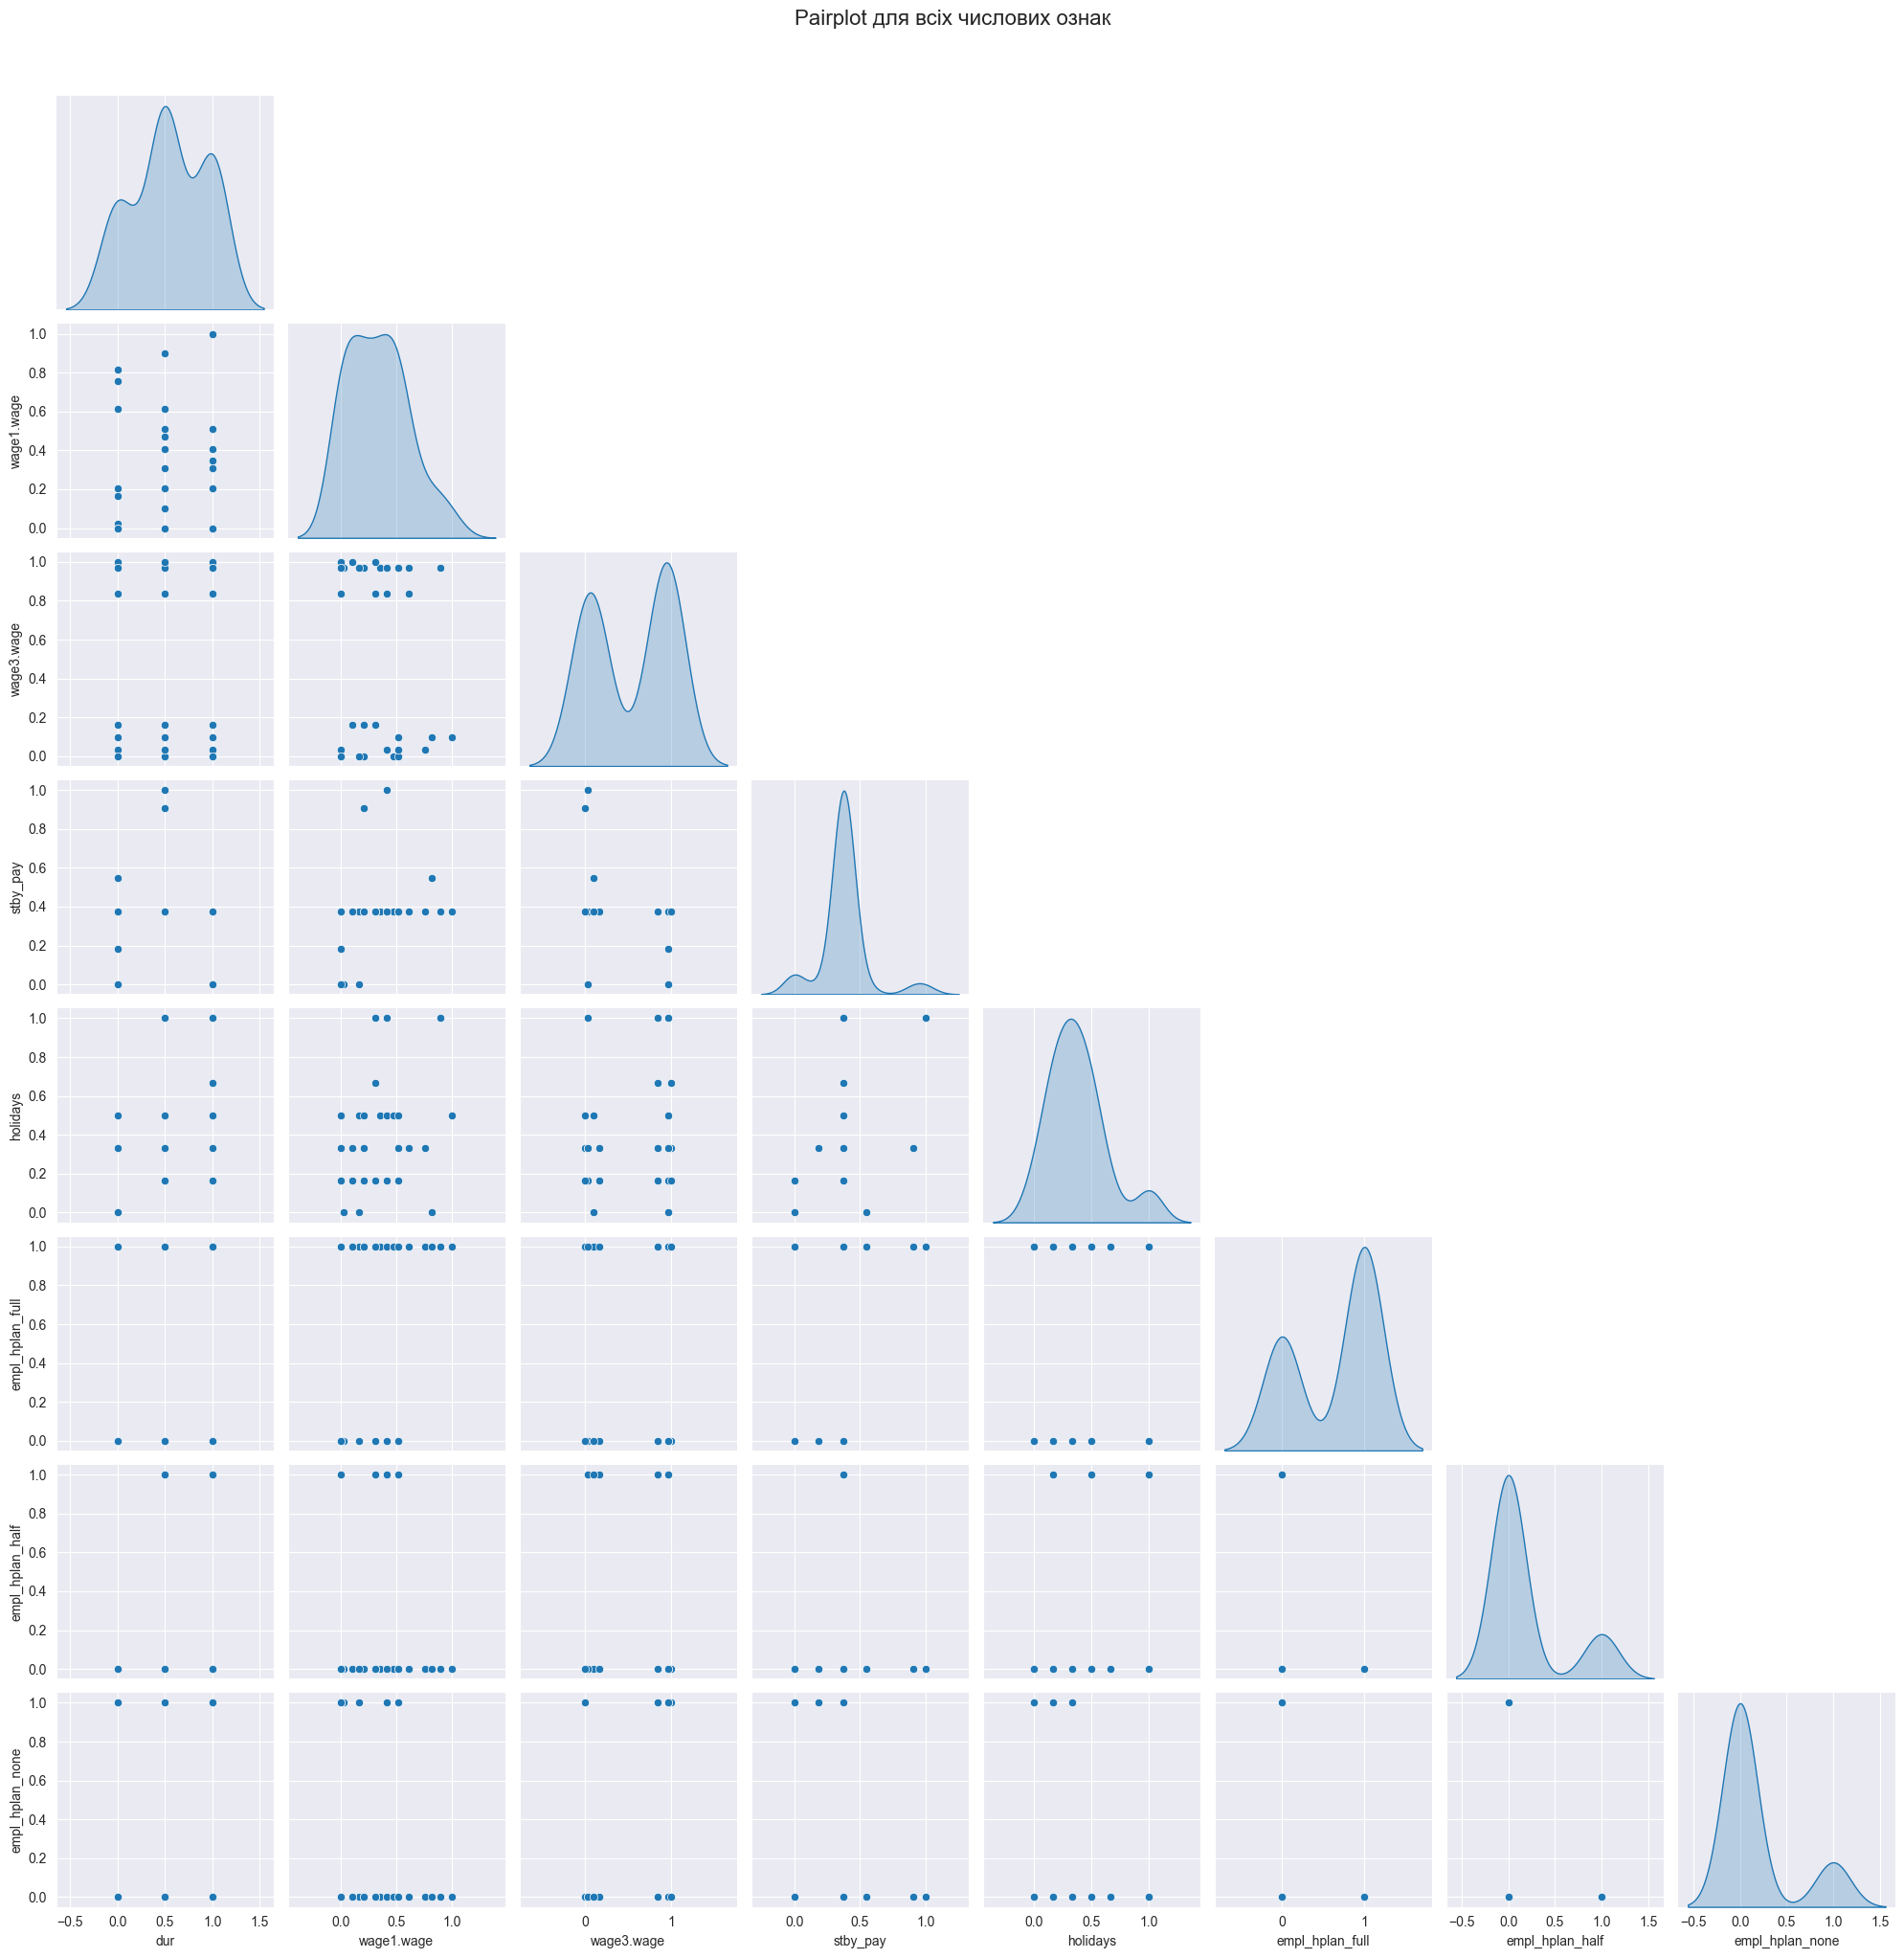

In [70]:
numeric_cols = energy_df.select_dtypes(include=['int32', 'int64', 'float32', 'float64']).columns
sns.pairplot(energy_df[numeric_cols], diag_kind="kde", corner=True)
plt.suptitle("Pairplot для всіх числових ознак", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

C:\Users\didya\AppData\Local\Temp\ipykernel_6672\409707006.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_from_np = df_from_np.apply(pd.to_numeric, errors='ignore')


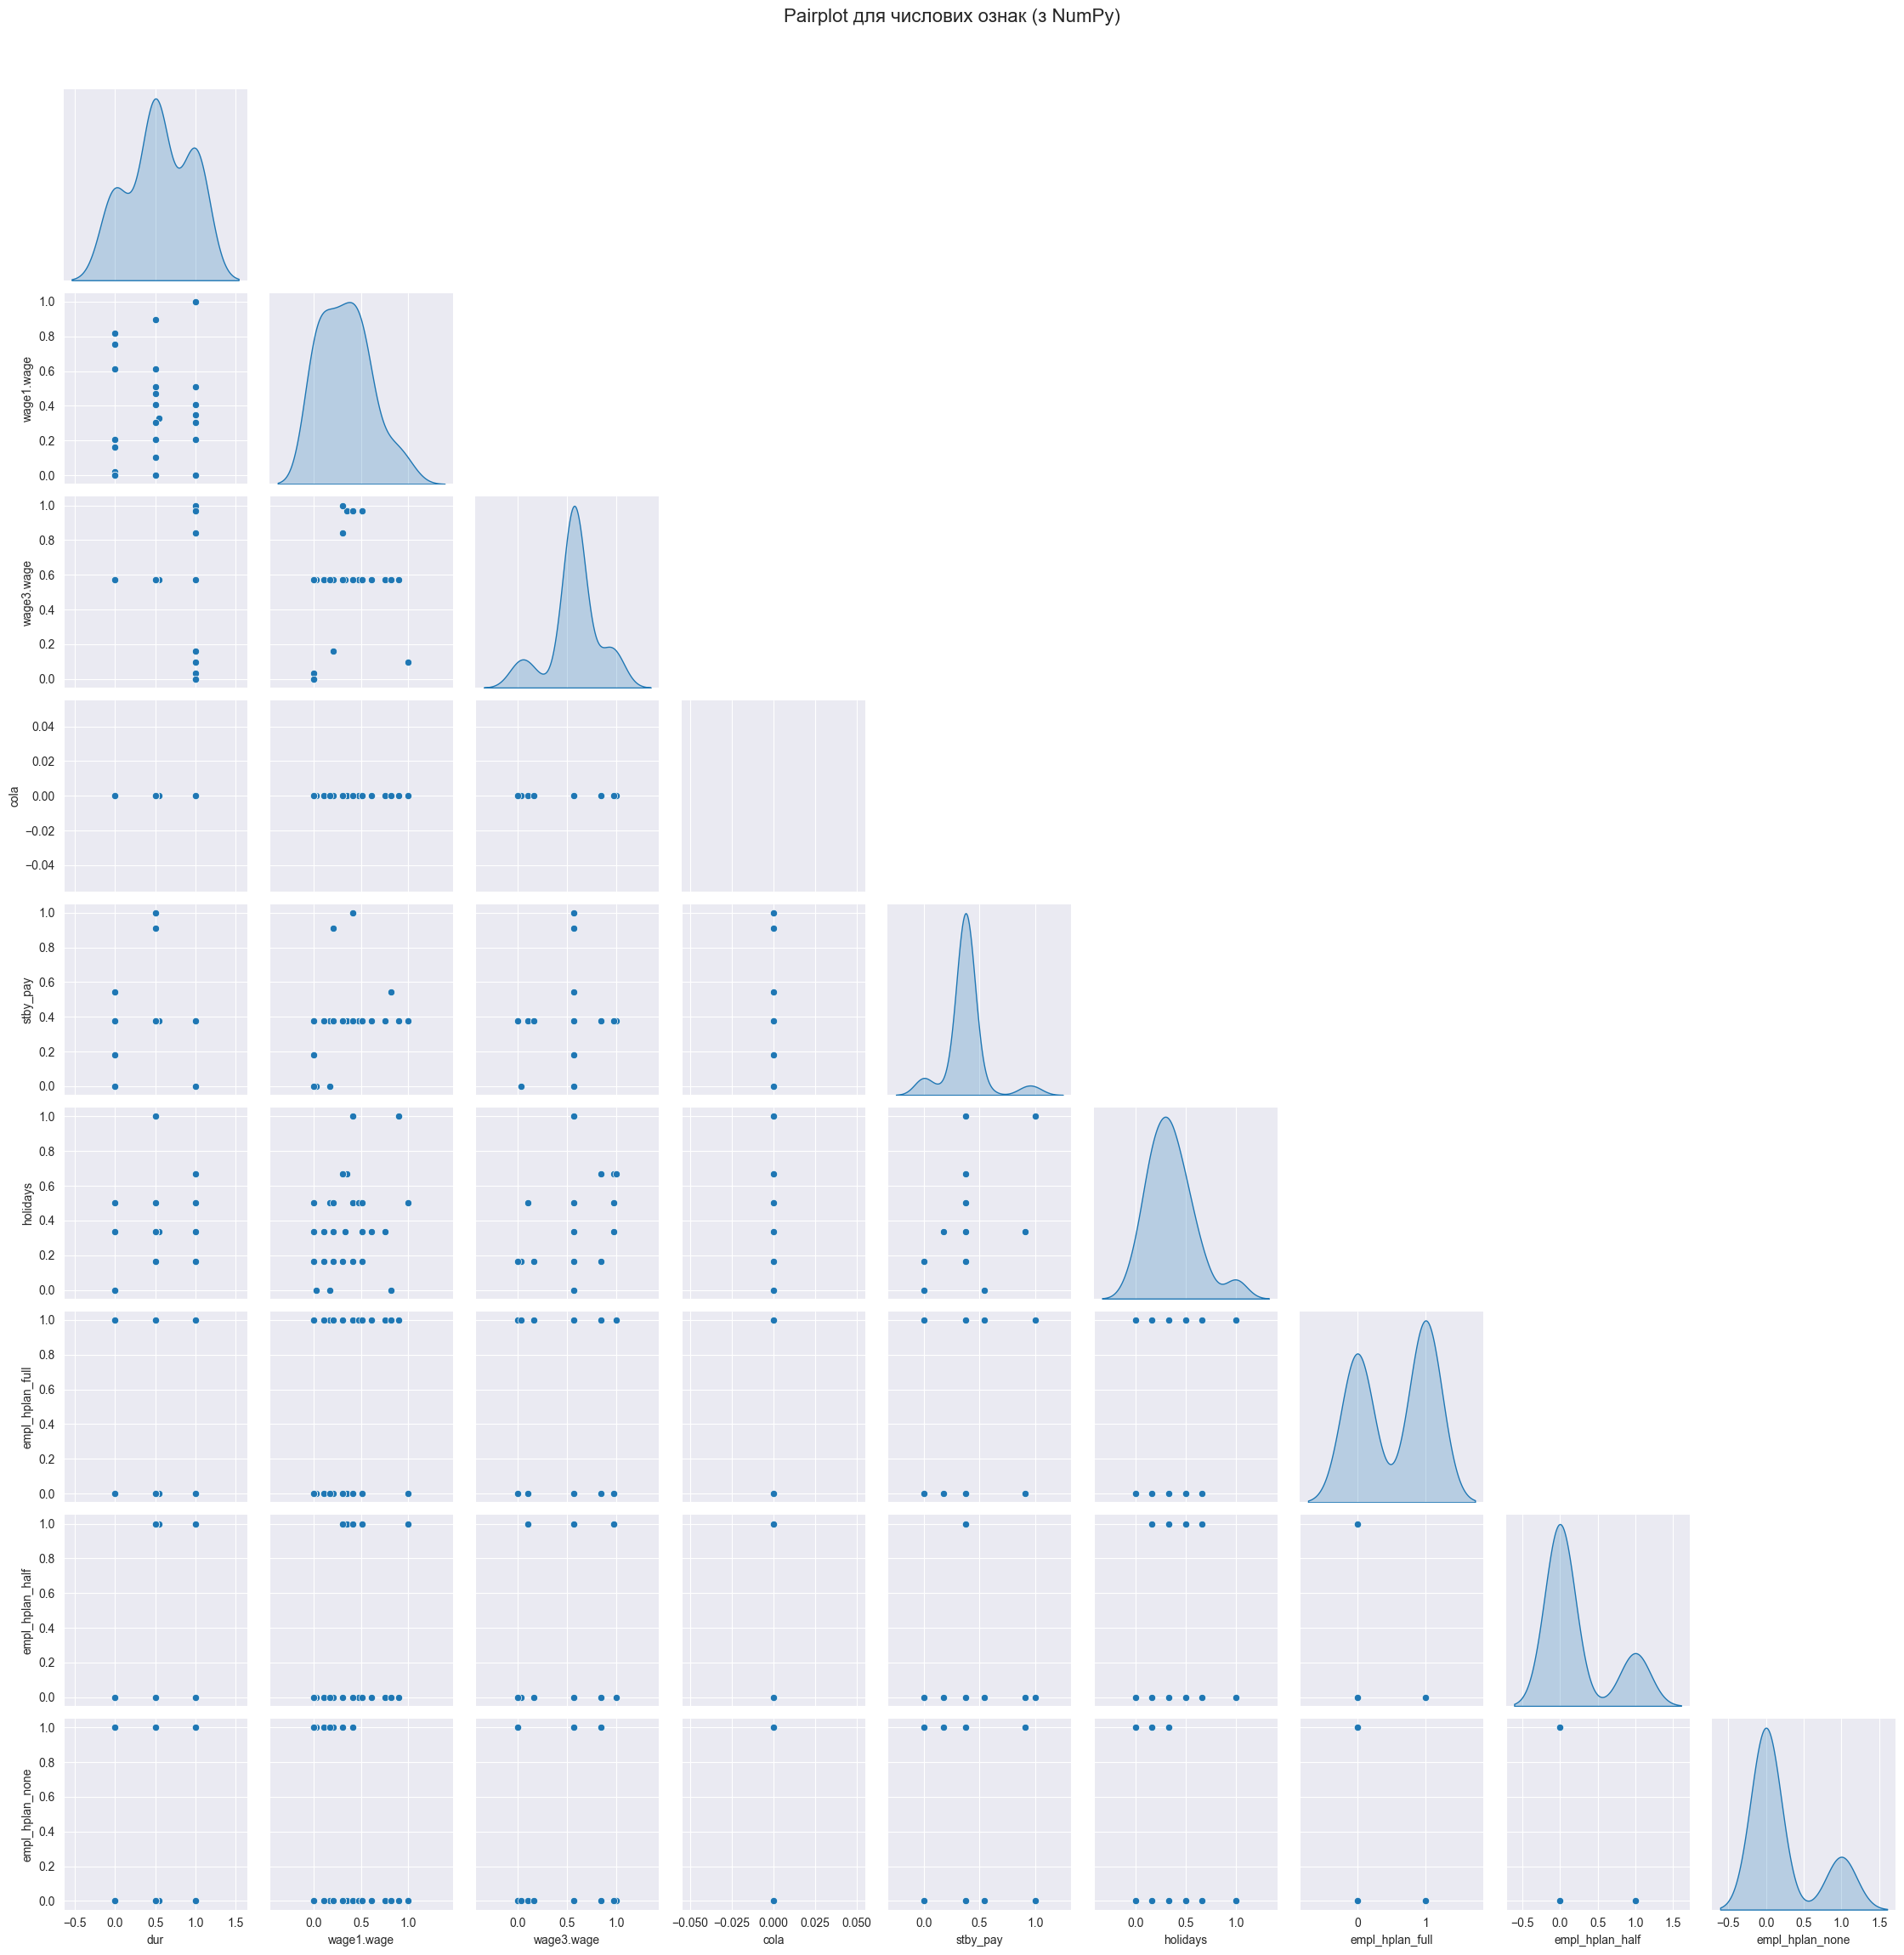

In [73]:
df_from_np = pd.DataFrame(np_data_encoded, columns=np_headers_encoded)
df_from_np = df_from_np.apply(pd.to_numeric, errors='ignore')
numeric_cols = df_from_np.select_dtypes(include=['int64', 'float64']).columns
sns.pairplot(df_from_np[numeric_cols], diag_kind="kde", corner=True)
plt.suptitle("Pairplot для числових ознак (з NumPy)", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()